<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW4_JudsonLimaTrial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 4

Judson Lima

OPTI 556, Fall 2023

##Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist


import warnings
warnings.filterwarnings('ignore')


## Simulated coded aperture

A coded aperture can eliminate the tradeoff between light sensitivity and res- olution by using small features to maximize resolution while using multiple features to increase throughput.

The difference between coded aperture and pinhole image is simply that the impulse response becomes the coded pattern rather than the pinhole; each object point projects the shadow of the coded aperture.

Assuming that the sampling rate on the coded aperture is the same as the sampling rate on the sensor plane, $\hat{p}_{i+i′=0,j+j′=0}(θ_x,θ_y)$, for rect pattern coded aperture and sensor plane functions. $\hat{p}_{i,j}(θ_x,θ_y)$ is a weighting function for producing the discrete measurement $\hat{f}_{i,j}$ from the continuous object distribution.

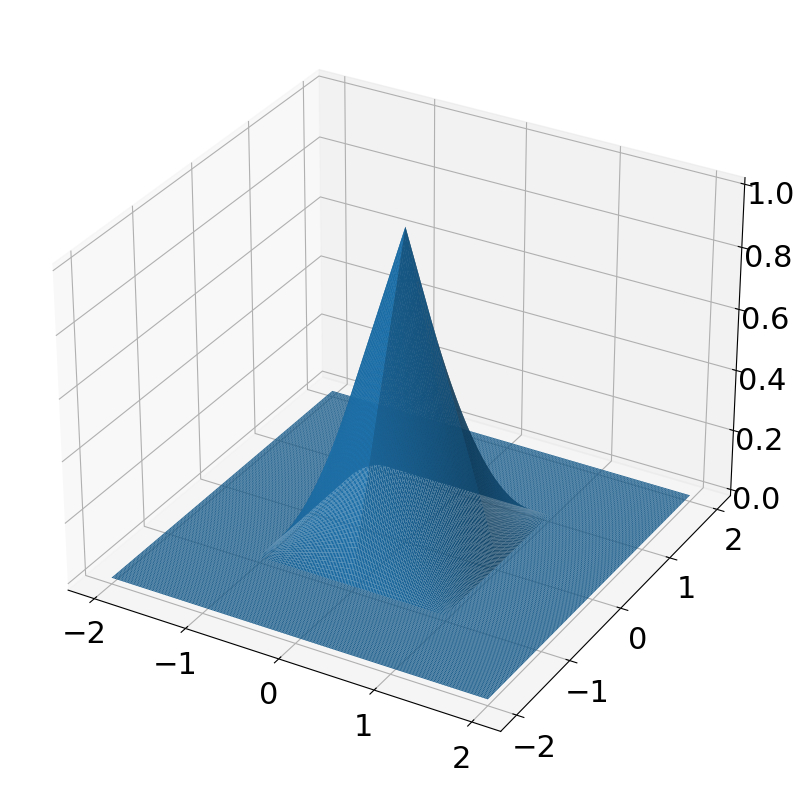

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
pixel=np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)]=1
sampFun=signal.convolve2d(pixel,pixel)
sampFun=sampFun/np.max(sampFun)
fig=plt.figure()

ax = fig.add_subplot(projection='3d')

X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))


surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)

### Building Coded patterns 59x59

Quadratic residues

In [ ]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

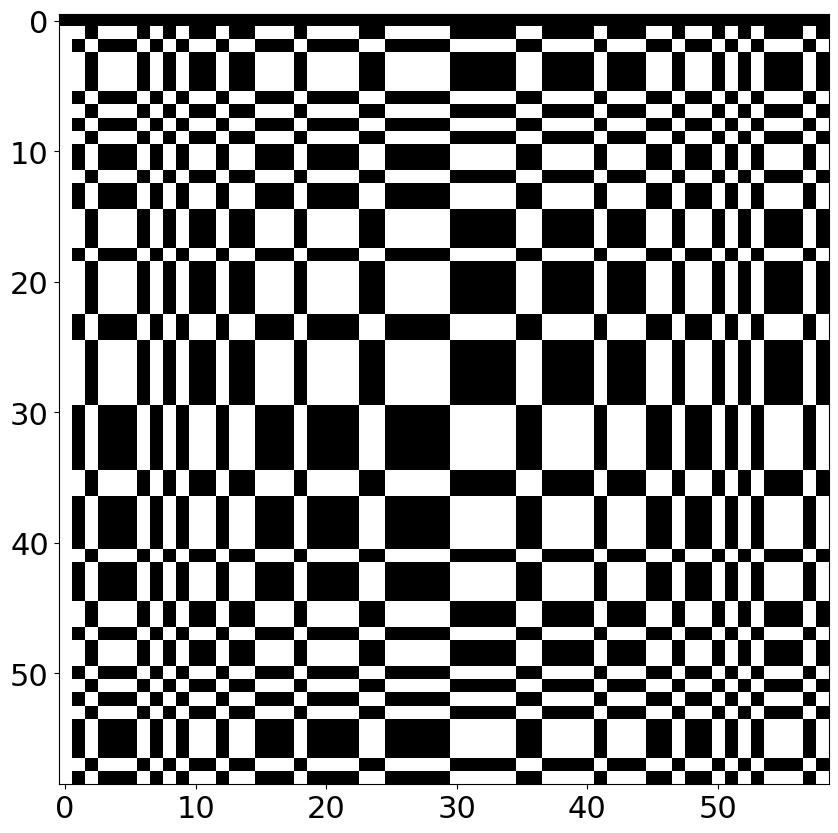

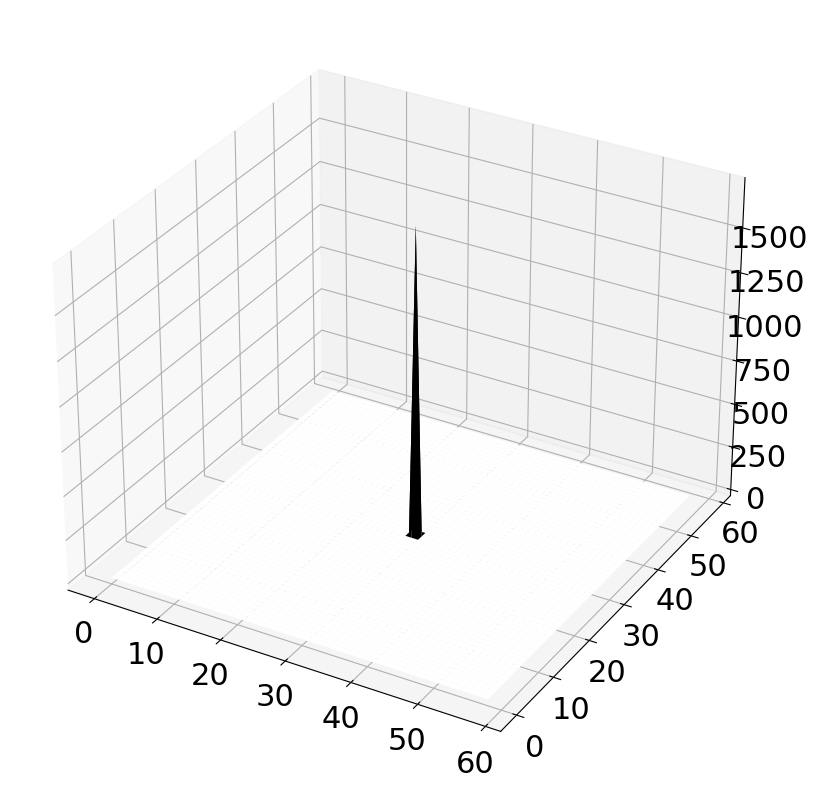

In [ ]:
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
plt.imshow(t,cmap='gray');
fig=plt.figure()

ax = fig.add_subplot(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
#plt.title('Cross Corelation with Decoding Pattern')


In [ ]:
# load the mnist dataset of characters


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

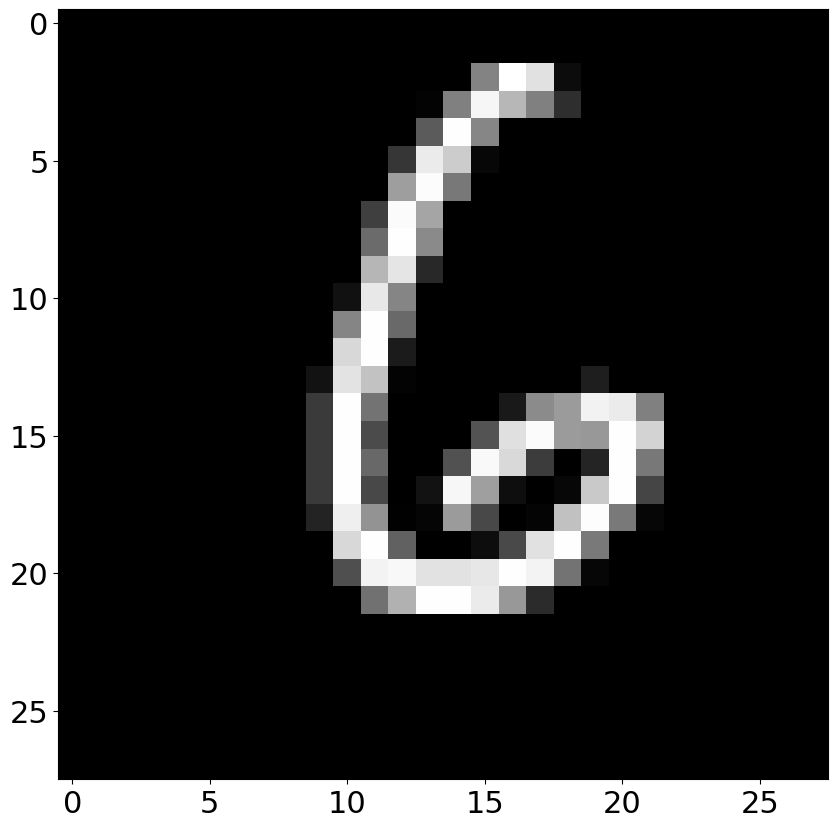

In [ ]:
plt.imshow(x_train[32],cmap='gray')

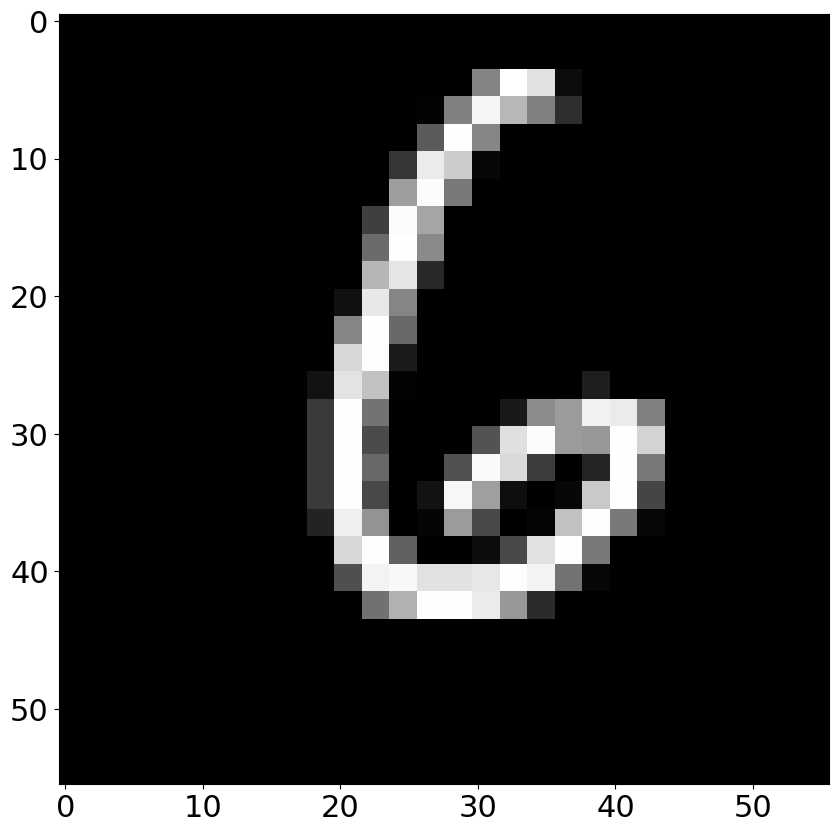

In [ ]:
Scaledimg = cv2.resize(x_train[32], dsize=(56, 56), interpolation=cv2.INTER_NEAREST)
plt.imshow(Scaledimg,cmap='gray')

## 1. Images using linear reconstruction

Linear reconstruction with no noise

(-0.5, 58.5, 58.5, -0.5)

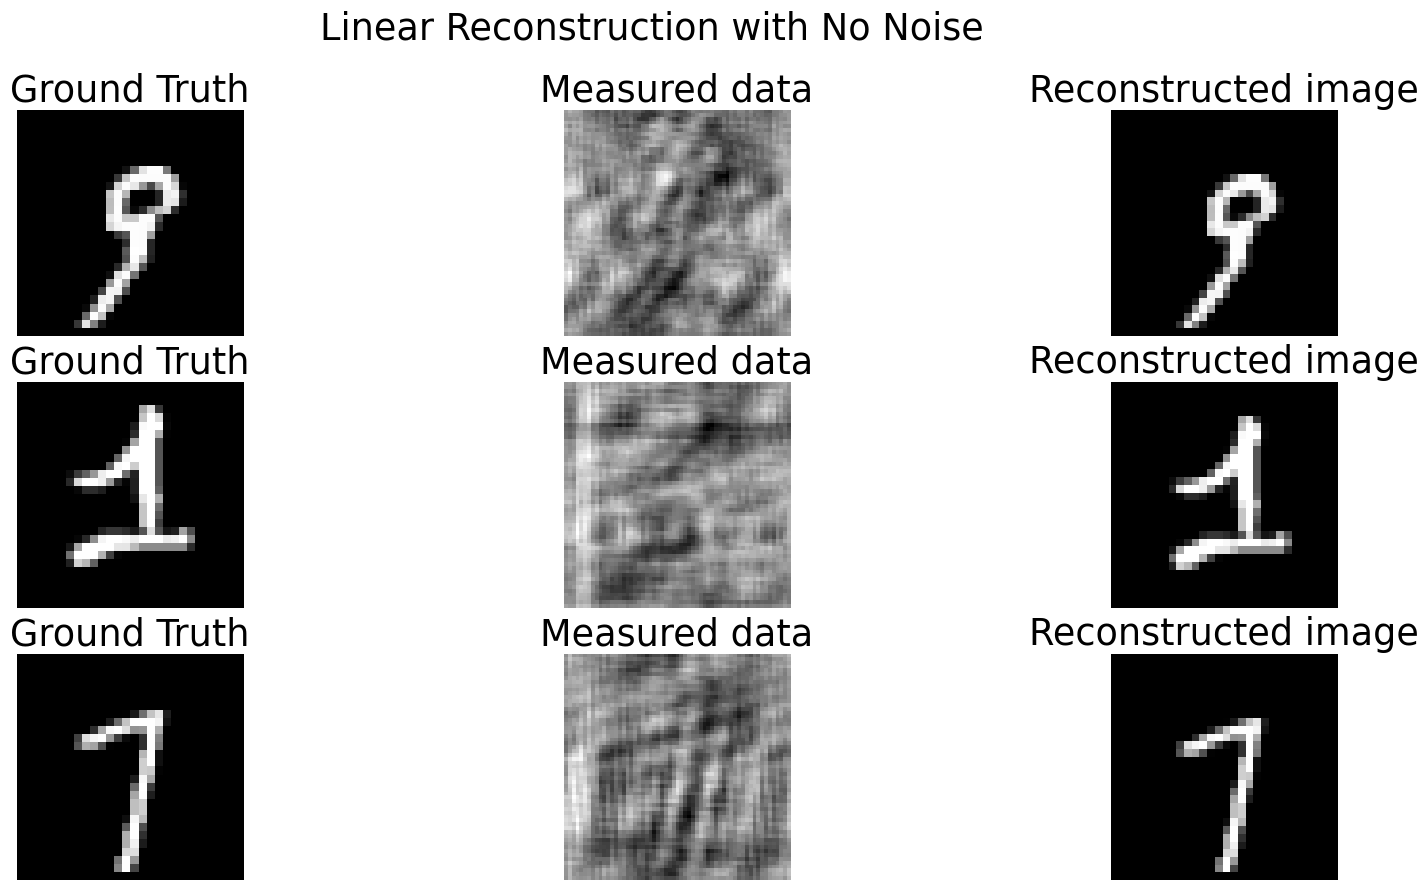

In [ ]:

plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits

plt.suptitle('Linear Reconstruction with No Noise')

imagey= cv2.resize(x_train[19], dsize=(56, 56), interpolation=cv2.INTER_NEAREST);

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey= cv2.resize(x_train[24], dsize=(56, 56), interpolation=cv2.INTER_NEAREST);

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey= cv2.resize(x_train[42], dsize=(56, 56), interpolation=cv2.INTER_NEAREST);

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')


Linear reconstruction with poisson noise

(-0.5, 58.5, 58.5, -0.5)

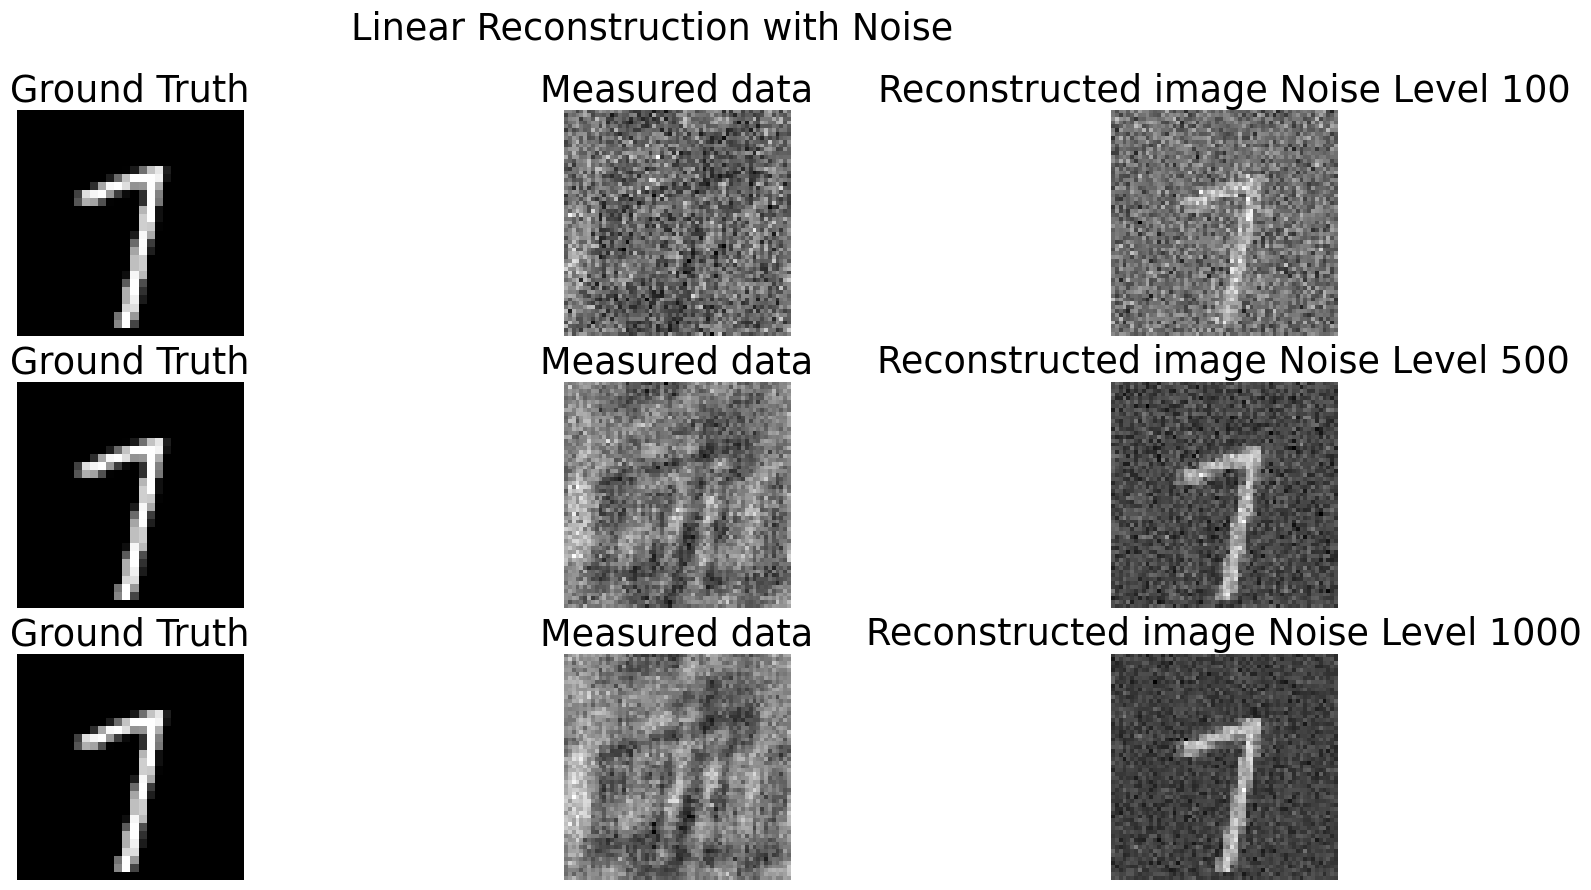

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits

plt.suptitle('Linear Reconstruction with Noise')

imagey= cv2.resize(x_train[42], dsize=(56, 56), interpolation=cv2.INTER_NEAREST);

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image Noise Level 100');
plt.axis('off')


# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=500
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image Noise Level 500');
plt.axis('off')


# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image Noise Level 1000');
plt.axis('off')



### Results

Noise sensitivity is a primary concern in coded aperture and other multiplex sensor systems.

Shot noise is Poisson distributed, simulates the effect on coded aperture reconstruction of shot noise with a peak flux of 100 photons per measurement (level).

Above are images with various levels of dependant noise added to the system. As the photos per pixel of noise added gets higher the reconstructed images get clearer. This would simulate the sensitivity of the detector as more and more pixels are gathered at the moment of image capture.

## 2. Images using Neural denoising

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


In [ ]:
def resize_batch(img_batch, resize_width, resize_height):
    """
    :params
        image: np.array(), shape -> (batch, width, height)
        resize_width: The resize width dimension.
        resize_height: The resize height dimension.

    :returns
        array of shape -> (batch, resized_width, resized_height)
    """
    batch, original_width, original_height= img_batch.shape

    old_img = img_batch[:,:,:]


    resized_images = np.zeros((batch, resize_width, resize_height))

    x_scale = original_width/resize_width
    y_scale = original_height/resize_height

    resize_idx = np.zeros((resize_width, resize_height))
    resize_index_x = np.ceil(np.arange(0, original_width, x_scale)).astype(int)
    resize_index_y = np.ceil(np.arange(0, original_height, y_scale)).astype(int)
    resize_index_x[np.where(resize_index_x == original_width)]  -= 1
    resize_index_y[np.where(resize_index_y == original_height)] -= 1

    resized_images[:,:,:] = old_img[:,resize_index_x,:][:,:,resize_index_y]

    return resized_images

In [ ]:
x_testL=resize_batch(x_test,56,56);
x_trainL=resize_batch(x_train,56,56);


In [ ]:
np.shape(x_train)

(60000, 28, 28)

In [ ]:
np.shape(x_trainL)

(60000, 56, 56)

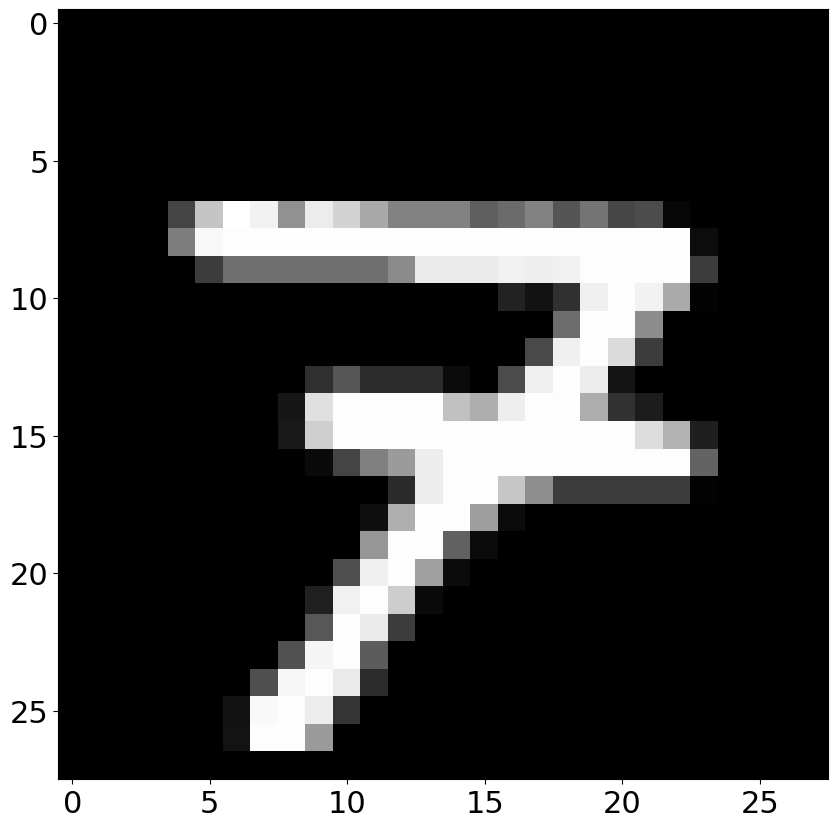

In [ ]:
plt.imshow(x_test[64],cmap='gray')

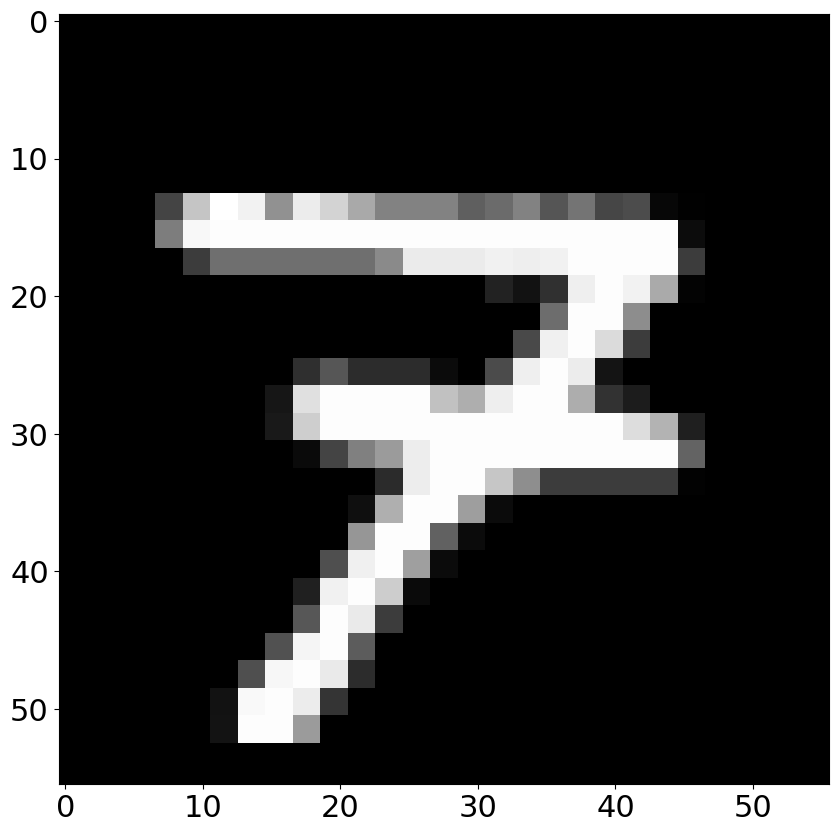

In [ ]:
plt.imshow(x_testL[64],cmap='gray')

In [ ]:
g_test=np.zeros(np.shape(x_testL))
g_train=np.zeros(np.shape(x_trainL))
for pop in range(np.shape(x_testL)[0]):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_testL[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(56,56))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_trainL)[0]):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_trainL[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(56,56))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])

x_train = np.reshape(x_trainL, (len(x_trainL), 56, 56, 1))
x_test = np.reshape(x_testL, (len(x_testL), 56, 56, 1))
g_train = np.reshape(g_train, (len(g_train), 56, 56, 1))
g_test = np.reshape(g_test, (len(g_test), 56, 56, 1))

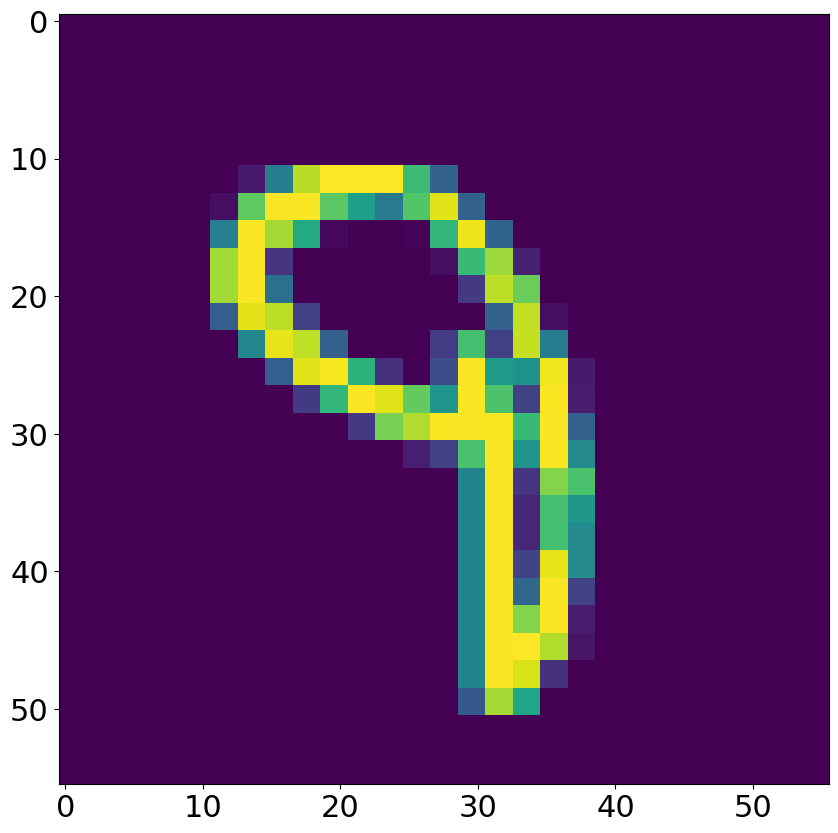

In [ ]:
plt.imshow(x_test[193].reshape(56, 56))

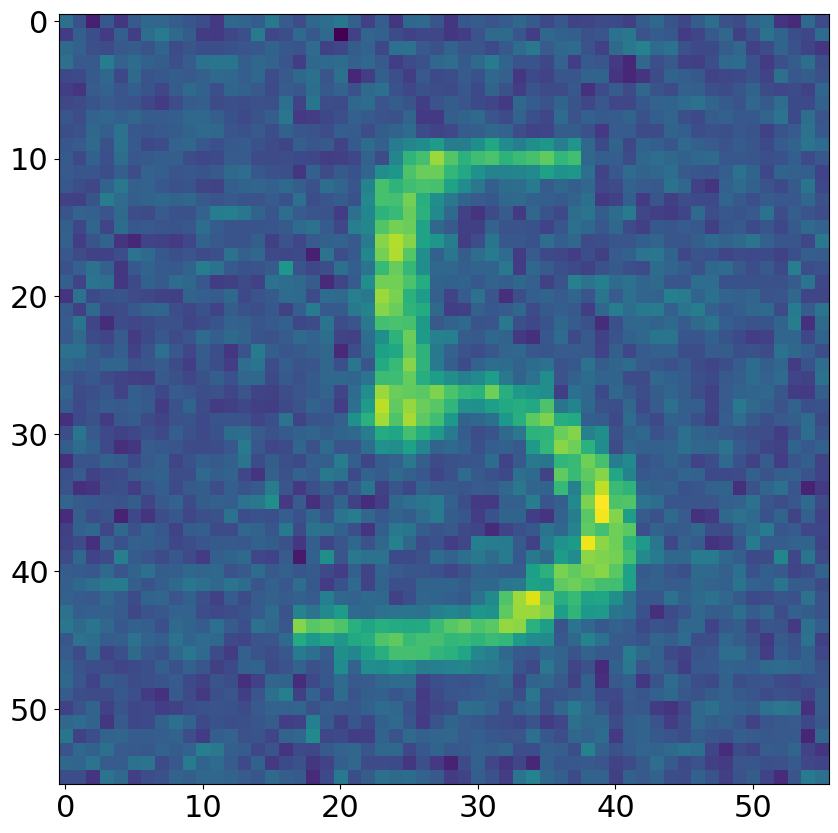

In [ ]:
plt.imshow(g_test[1931].reshape(56, 56))

Model 1

In [ ]:
input_img = keras.Input(shape=(56, 56, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


# At this point the representation is (14, 14, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248  

Training 1

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)


Epoch 1/10
469/469 [==============================] - 293s 621ms/step - loss: 0.1056 - val_loss: 0.0749
Epoch 2/10
469/469 [==============================] - 290s 619ms/step - loss: 0.0736 - val_loss: 0.0720
Epoch 3/10
469/469 [==============================] - 296s 632ms/step - loss: 0.0714 - val_loss: 0.0702
Epoch 4/10
469/469 [==============================] - 292s 624ms/step - loss: 0.0702 - val_loss: 0.0693
Epoch 5/10
469/469 [==============================] - 291s 621ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 6/10
469/469 [==============================] - 291s 619ms/step - loss: 0.0689 - val_loss: 0.0682
Epoch 7/10
469/469 [==============================] - 290s 619ms/step - loss: 0.0685 - val_loss: 0.0680
Epoch 8/10
469/469 [==============================] - 290s 618ms/step - loss: 0.0681 - val_loss: 0.0675
Epoch 9/10
469/469 [==============================] - 288s 615ms/step - loss: 0.0677 - val_loss: 0.0671
Epoch 10/10
469/469 [==============================] - 289s 617m

Noisy and Denoised images

1/1 [==============================] - 0s 18ms/step


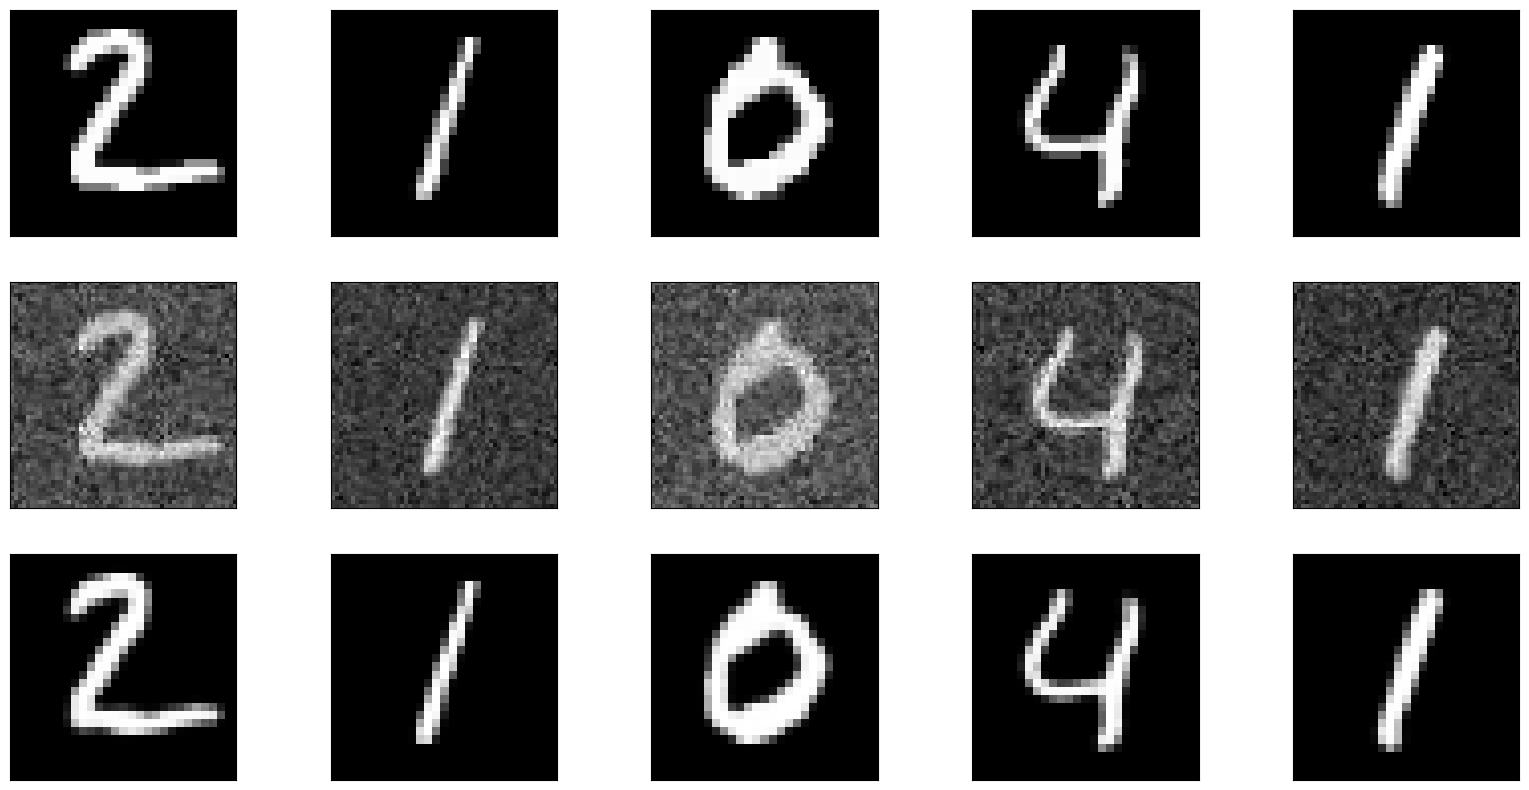

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 [==============================] - 0s 24ms/step


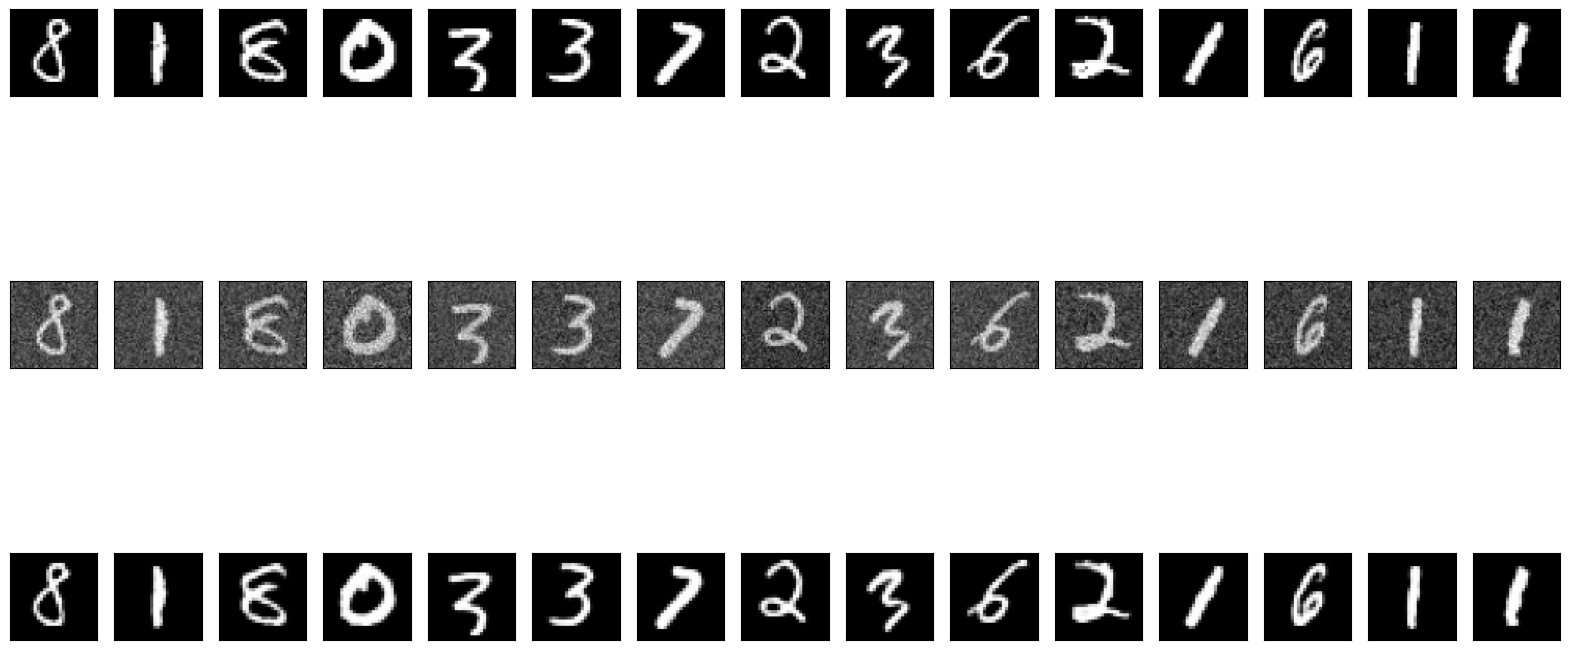

In [ ]:
m = 1200 #sequence start of 10000
n = 15 #number of images to check
plt.figure(figsize=(20, 10))
for i in range(m, m + n):
    ax = plt.subplot(3, n, i-(m-1))
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i-(m-1))
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+(i-(m-1)))
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# save mnist Denoiser

!rm -r mistDenoiser/
autoencoder.save("mnistDenoiser")
!tar -czvf mnistDenoiser.tar.gz mnistDenoiser/
files.download('mnistDenoiser.tar.gz')

rm: cannot remove 'mistDenoiser/': No such file or directory
mnistDenoiser/
mnistDenoiser/fingerprint.pb
mnistDenoiser/saved_model.pb
mnistDenoiser/variables/
mnistDenoiser/variables/variables.data-00000-of-00001
mnistDenoiser/variables/variables.index
mnistDenoiser/keras_metadata.pb
mnistDenoiser/assets/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 2

In [ ]:
input_img = keras.Input(shape=(56, 56, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (14, 14, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        9248

Training 2

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)


Epoch 1/10
469/469 [==============================] - 334s 709ms/step - loss: 0.1253 - val_loss: 0.0813
Epoch 2/10
469/469 [==============================] - 317s 675ms/step - loss: 0.0792 - val_loss: 0.0760
Epoch 3/10
469/469 [==============================] - 339s 723ms/step - loss: 0.0754 - val_loss: 0.0735
Epoch 4/10
469/469 [==============================] - 325s 692ms/step - loss: 0.0735 - val_loss: 0.0729
Epoch 5/10
469/469 [==============================] - 309s 659ms/step - loss: 0.0723 - val_loss: 0.0712
Epoch 6/10
469/469 [==============================] - 307s 655ms/step - loss: 0.0714 - val_loss: 0.0704
Epoch 7/10
469/469 [==============================] - 329s 701ms/step - loss: 0.0707 - val_loss: 0.0703
Epoch 8/10
469/469 [==============================] - 311s 664ms/step - loss: 0.0702 - val_loss: 0.0696
Epoch 9/10
469/469 [==============================] - 317s 676ms/step - loss: 0.0698 - val_loss: 0.0696
Epoch 10/10
469/469 [==============================] - 308s 657m

1/1 [==============================] - 0s 19ms/step


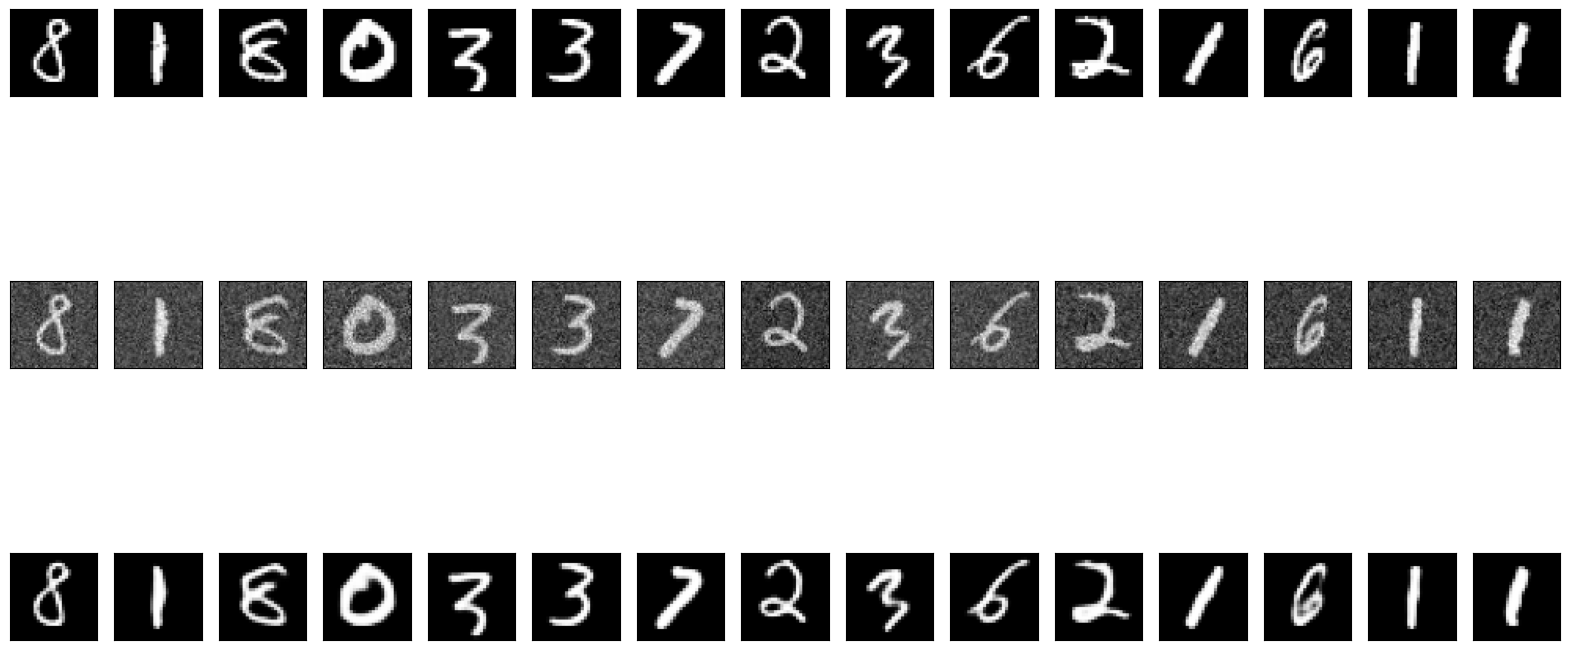

In [ ]:
m = 1200 #sequence start of 10000
n = 15 #number of images to check
plt.figure(figsize=(20, 10))
for i in range(m, m + n):
    ax = plt.subplot(3, n, i-(m-1))
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i-(m-1))
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+(i-(m-1)))
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# save mnist Denoiser2

!rm -r mistDenoiser/
autoencoder.save("mnistDenoiser")
!tar -czvf mnistDenoiser2.tar.gz mnistDenoiser/
files.download('mnistDenoiser2.tar.gz')

rm: cannot remove 'mistDenoiser/': No such file or directory
mnistDenoiser/
mnistDenoiser/fingerprint.pb
mnistDenoiser/saved_model.pb
mnistDenoiser/variables/
mnistDenoiser/variables/variables.data-00000-of-00001
mnistDenoiser/variables/variables.index
mnistDenoiser/keras_metadata.pb
mnistDenoiser/assets/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Quasi-random signal

1/1 [==============================] - 0s 19ms/step


(-0.5, 55.5, 55.5, -0.5)

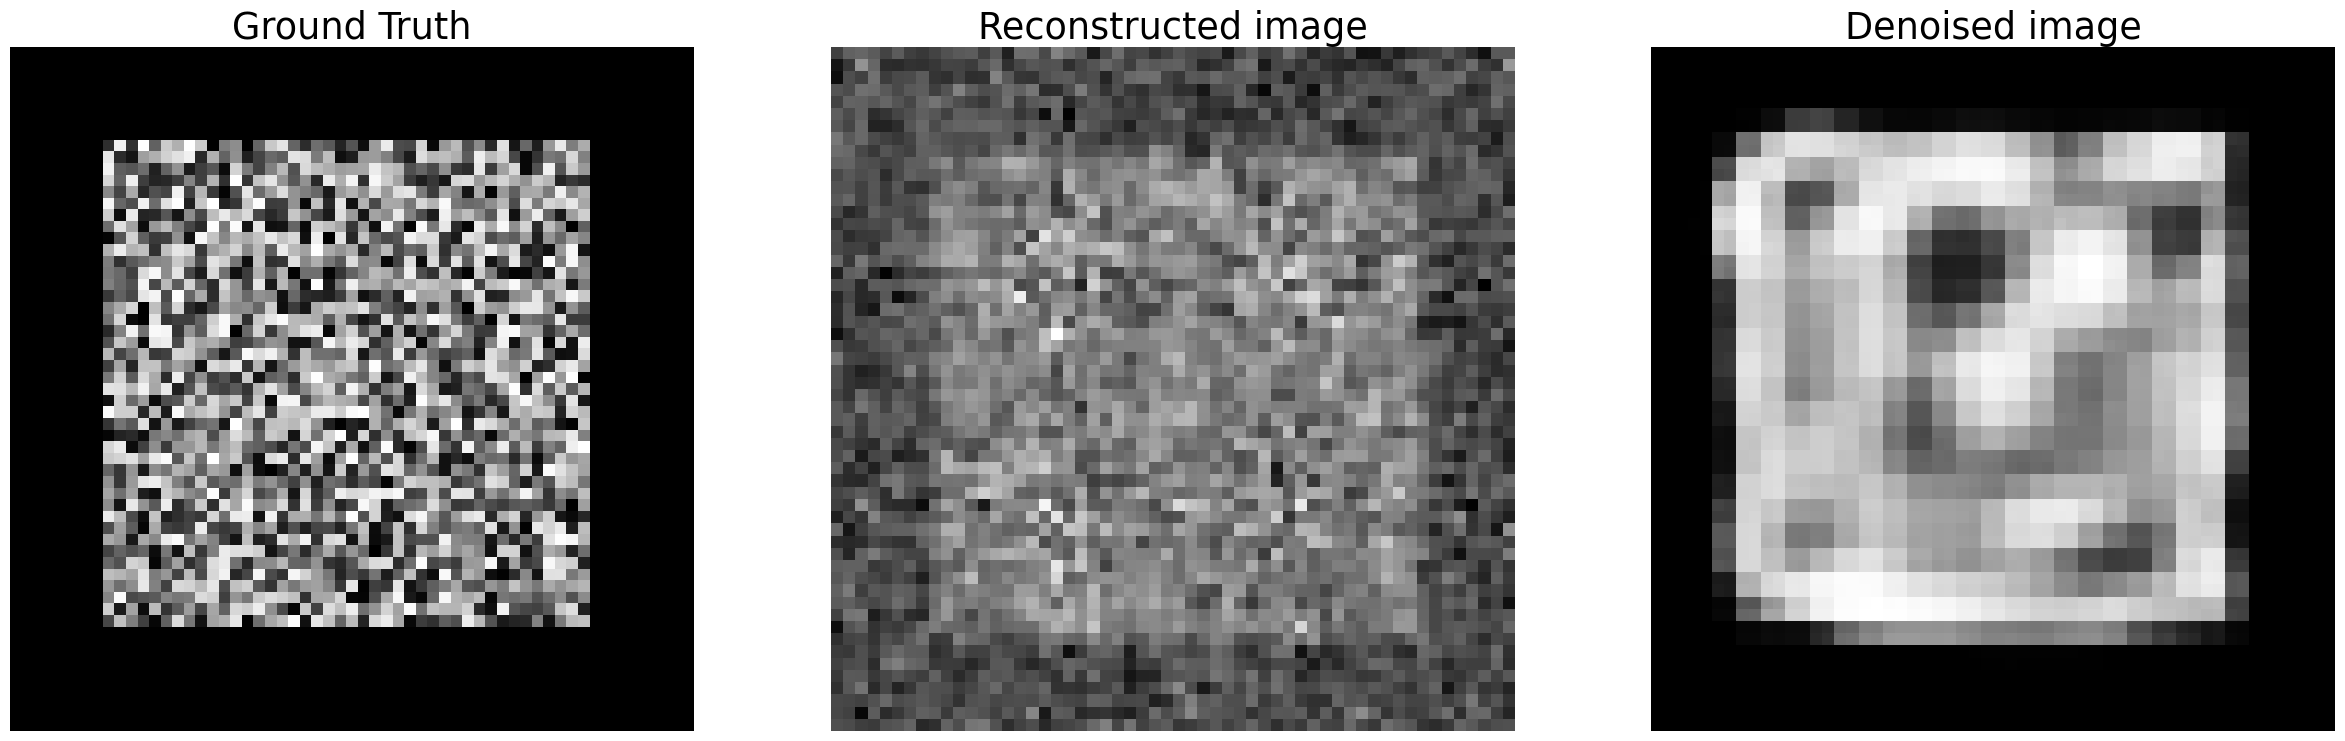

In [ ]:
imagey=np.zeros((59,59))
imagey[8:50,8:50]=np.random.rand(42,42)
plt.subplot(1,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
plt.subplot(1,3,2);
fe=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,imagey, mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(56,56))
fe=fe/np.max(fe)
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
plt.subplot(1,3,3);
plt.imshow(autoencoder.predict(np.reshape(fe,(1,56,56,1)))[0,:,:,0])
plt.gray()
plt.title('Denoised image');
plt.axis('off')

### Results

A handful of the second plot, in this section, shows images that did not perform well with the neural denoiser. Images where the solid number had rough edges along the path of the writing came out smoother then the ground truth. After running it again with more layers in the training model we can see that the new model smooths much more. We can also see, based on the latest plot, that a quasi-random ground truth pattern will also not be denoised properly when noise is present.

## 3. Images using radon data

In [3]:
from skimage.transform import radon, rescale,  resize, warp
from scipy import interpolate
from skimage.transform import iradon_sart


In [4]:
# load the mnist dataset of characters
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

###Sinograms of various images

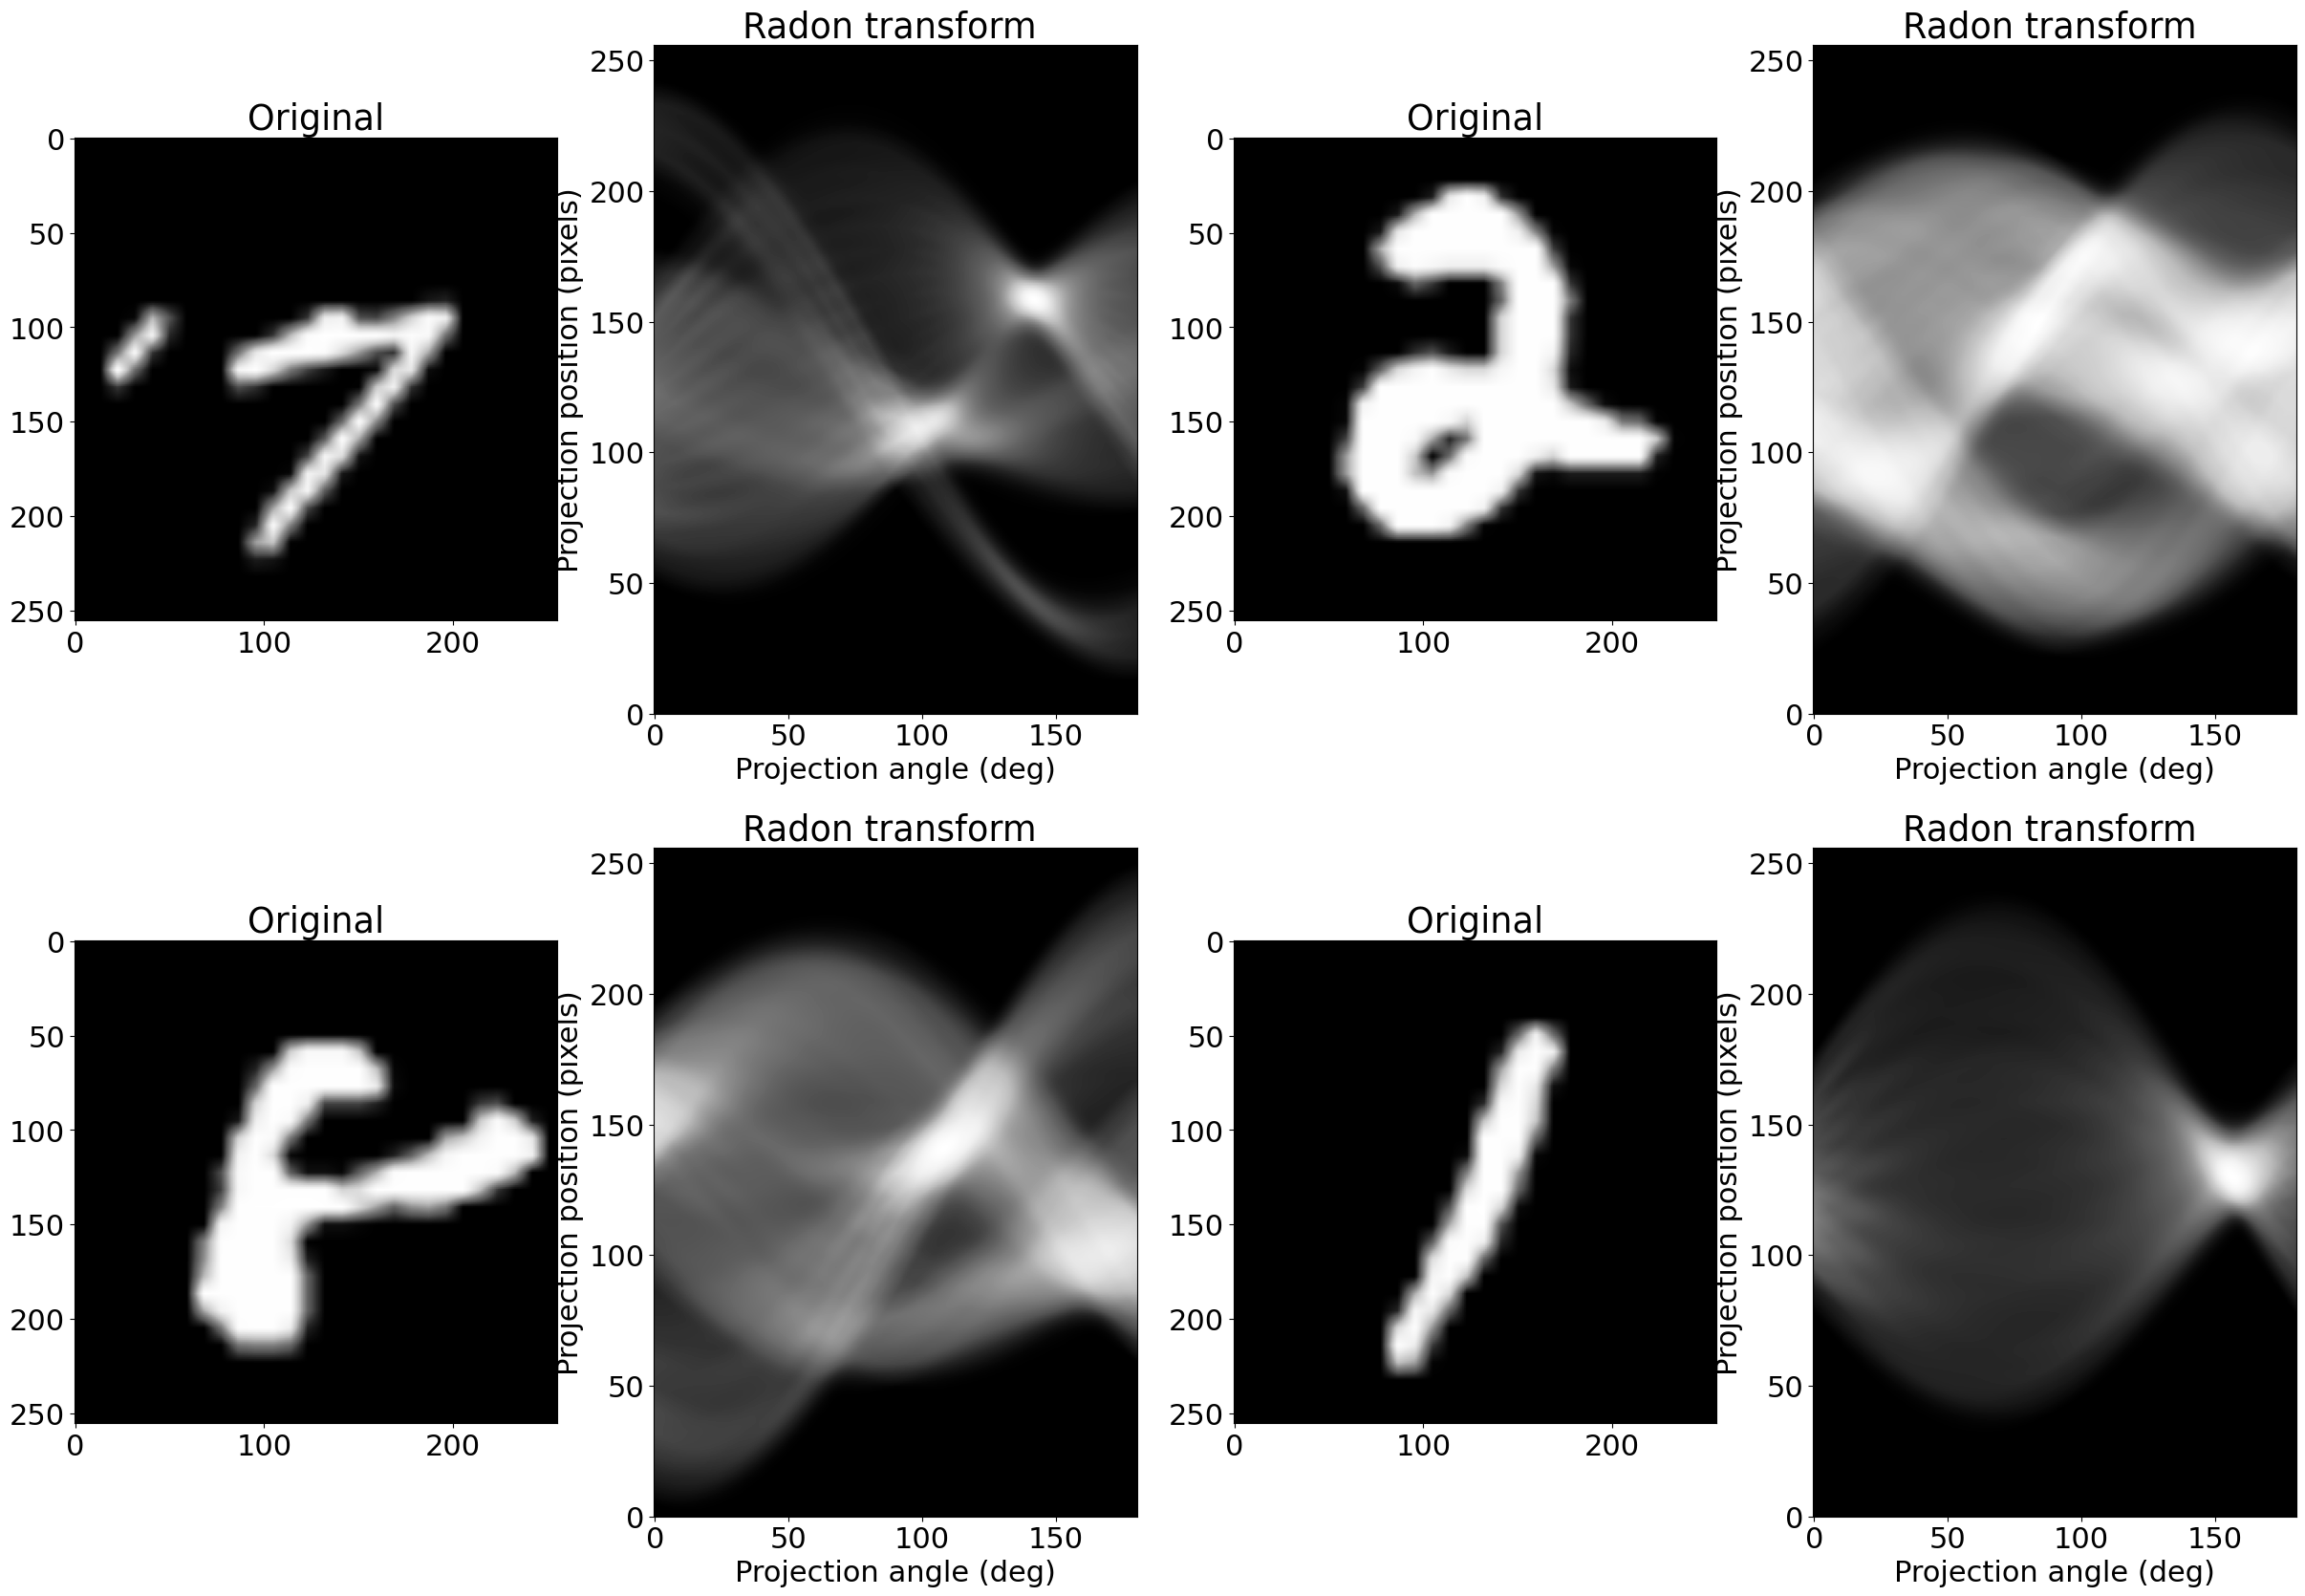

In [ ]:
# code from https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html


fig, ax = plt.subplots(2, 4, figsize=(30, 20))
nP=256
image=x_train[1023,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[0,0].set_title("Original")
ax[0,0].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[0,1].set_title("Radon transform ")
ax[0,1].set_xlabel("Projection angle (deg)")
ax[0,1].set_ylabel("Projection position (pixels)")
ax[0,1].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[6125,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[0,2].set_title("Original")
ax[0,2].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[0,3].set_title("Radon transform ")
ax[0,3].set_xlabel("Projection angle (deg)")
ax[0,3].set_ylabel("Projection position (pixels)")
ax[0,3].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[8029,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[1,0].set_title("Original")
ax[1,0].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[1,1].set_title("Radon transform ")
ax[1,1].set_xlabel("Projection angle (deg)")
ax[1,1].set_ylabel("Projection position (pixels)")
ax[1,1].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[5428,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[1,2].set_title("Original")
ax[1,2].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[1,3].set_title("Radon transform ")
ax[1,3].set_xlabel("Projection angle (deg)")
ax[1,3].set_ylabel("Projection position (pixels)")
ax[1,3].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

### Modified iradon function

here we modify the iradon function from https://github.com/scikit-image/scikit-image to also return the filtered projections $Q(l,\theta)$

In [5]:
from scipy.interpolate import interp1d
from scipy.constants import golden_ratio
from skimage.transform._warps import warp
from skimage.transform._radon_transform import sart_projection_update
#from skimage._shared.fft import fftmodule
from skimage._shared.utils import  convert_to_float
from warnings import warn
from functools import partial

fftmodule = np.fft;

if fftmodule is np.fft:
    # fallback from scipy.fft to scipy.fftpack instead of numpy.fft
    # (fftpack preserves single precision while numpy.fft does not)
    from scipy.fftpack import fft, ifft
else:
    fft = fftmodule.fft
    ifft = fftmodule.ifft

def iradon(radon_image, theta=None, output_size=None,
           filter_name="ramp", interpolation="linear", circle=True,
           preserve_range=True):
    """Inverse radon transform.

    Reconstruct an image from the radon transform, using the filtered
    back projection algorithm.

    Parameters
    ----------
    radon_image : array
        Image containing radon transform (sinogram). Each column of
        the image corresponds to a projection along a different
        angle. The tomography rotation axis should lie at the pixel
        index ``radon_image.shape[0] // 2`` along the 0th dimension of
        ``radon_image``.
    theta : array_like, optional
        Reconstruction angles (in degrees). Default: m angles evenly spaced
        between 0 and 180 (if the shape of `radon_image` is (N, M)).
    output_size : int, optional
        Number of rows and columns in the reconstruction.
    filter_name : str, optional
        Filter used in frequency domain filtering. Ramp filter used by default.
        Filters available: ramp, shepp-logan, cosine, hamming, hann.
        Assign None to use no filter.
    interpolation : str, optional
        Interpolation method used in reconstruction. Methods available:
        'linear', 'nearest', and 'cubic' ('cubic' is slow).
    circle : boolean, optional
        Assume the reconstructed image is zero outside the inscribed circle.
        Also changes the default output_size to match the behaviour of
        ``radon`` called with ``circle=True``.
    preserve_range : bool, optional
        Whether to keep the original range of values. Otherwise, the input
        image is converted according to the conventions of `img_as_float`.
        Also see https://scikit-image.org/docs/dev/user_guide/data_types.html

    Returns
    -------
    reconstructed : ndarray
        Reconstructed image. The rotation axis will be located in the pixel
        with indices
        ``(reconstructed.shape[0] // 2, reconstructed.shape[1] // 2)``.

    .. versionchanged :: 0.19
        In ``iradon``, ``filter`` argument is deprecated in favor of
        ``filter_name``.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.
    .. [2] B.R. Ramesh, N. Srinivasa, K. Rajgopal, "An Algorithm for Computing
           the Discrete Radon Transform With Some Applications", Proceedings of
           the Fourth IEEE Region 10 International Conference, TENCON '89, 1989

    Notes
    -----
    It applies the Fourier slice theorem to reconstruct an image by
    multiplying the frequency domain of the filter with the FFT of the
    projection data. This algorithm is called filtered back projection.

    """
    if radon_image.ndim != 2:
        raise ValueError('The input image must be 2-D')

    if theta is None:
        theta = np.linspace(0, 180, radon_image.shape[1], endpoint=False)

    angles_count = len(theta)
    if angles_count != radon_image.shape[1]:
        raise ValueError("The given ``theta`` does not match the number of "
                         "projections in ``radon_image``.")

    interpolation_types = ('linear', 'nearest', 'cubic')
    if interpolation not in interpolation_types:
        raise ValueError("Unknown interpolation: %s" % interpolation)

    filter_types = ('ramp', 'shepp-logan', 'cosine', 'hamming', 'hann', None)
    if filter_name not in filter_types:
        raise ValueError("Unknown filter: %s" % filter_name)

    radon_image = convert_to_float(radon_image, preserve_range)
    dtype = radon_image.dtype

    img_shape = radon_image.shape[0]
    if output_size is None:
        # If output size not specified, estimate from input radon image
        if circle:
            output_size = img_shape
        else:
            output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0)))

    if circle:
        radon_image = _sinogram_circle_to_square(radon_image)
        img_shape = radon_image.shape[0]

    # Resize image to next power of two (but no less than 64) for
    # Fourier analysis; speeds up Fourier and lessens artifacts
    projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * img_shape))))
    pad_width = ((0, projection_size_padded - img_shape), (0, 0))
    img = np.pad(radon_image, pad_width, mode='constant', constant_values=0)

    # Apply filter in Fourier domain
    fourier_filter = _get_fourier_filter(projection_size_padded, filter_name)
    projection = fft(img, axis=0) * fourier_filter
    radon_filtered = np.real(ifft(projection, axis=0)[:img_shape, :])

    # Reconstruct image by interpolation
    reconstructed = np.zeros((output_size, output_size),
                             dtype=dtype)
    radius = output_size // 2
    xpr, ypr = np.mgrid[:output_size, :output_size] - radius
    x = np.arange(img_shape) - img_shape // 2

    for col, angle in zip(radon_filtered.T, np.deg2rad(theta)):
        t = ypr * np.cos(angle) - xpr * np.sin(angle)
        if interpolation == 'linear':
            interpolant = partial(np.interp, xp=x, fp=col, left=0, right=0)
        else:
            interpolant = interp1d(x, col, kind=interpolation,
                                   bounds_error=False, fill_value=0)
        reconstructed += interpolant(t)

    if circle:
        out_reconstruction_circle = (xpr ** 2 + ypr ** 2) > radius ** 2
        reconstructed[out_reconstruction_circle] = 0.

    return reconstructed * np.pi / (2 * angles_count), projection
def _sinogram_circle_to_square(sinogram):
    diagonal = int(np.ceil(np.sqrt(2) * sinogram.shape[0]))
    pad = diagonal - sinogram.shape[0]
    old_center = sinogram.shape[0] // 2
    new_center = diagonal // 2
    pad_before = new_center - old_center
    pad_width = ((pad_before, pad - pad_before), (0, 0))
    return np.pad(sinogram, pad_width, mode='constant', constant_values=0)
def _get_fourier_filter(size, filter_name):
    """Construct the Fourier filter.

    This computation lessens artifacts and removes a small bias as
    explained in [1], Chap 3. Equation 61.

    Parameters
    ----------
    size : int
        filter size. Must be even.
    filter_name : str
        Filter used in frequency domain filtering. Filters available:
        ramp, shepp-logan, cosine, hamming, hann. Assign None to use
        no filter.

    Returns
    -------
    fourier_filter: ndarray
        The computed Fourier filter.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.

    """
    n = np.concatenate((np.arange(1, size / 2 + 1, 2, dtype=int),
                        np.arange(size / 2 - 1, 0, -2, dtype=int)))
    f = np.zeros(size)
    f[0] = 0.25
    f[1::2] = -1 / (np.pi * n) ** 2

    # Computing the ramp filter from the fourier transform of its
    # frequency domain representation lessens artifacts and removes a
    # small bias as explained in [1], Chap 3. Equation 61
    fourier_filter = 2 * np.real(fft(f))         # ramp filter
    if filter_name == "ramp":
        pass
    elif filter_name == "shepp-logan":
        # Start from first element to avoid divide by zero
        omega = np.pi * fftmodule.fftfreq(size)[1:]
        fourier_filter[1:] *= np.sin(omega) / omega
    elif filter_name == "cosine":
        freq = np.linspace(0, np.pi, size, endpoint=False)
        cosine_filter = fftmodule.fftshift(np.sin(freq))
        fourier_filter *= cosine_filter
    elif filter_name == "hamming":
        fourier_filter *= fftmodule.fftshift(np.hamming(size))
    elif filter_name == "hann":
        fourier_filter *= fftmodule.fftshift(np.hanning(size))
    elif filter_name is None:
        fourier_filter[:] = 1

    return fourier_filter[:, np.newaxis]


Explicit convolution backprojection example

Text(0.5, 1.0, '(d)')

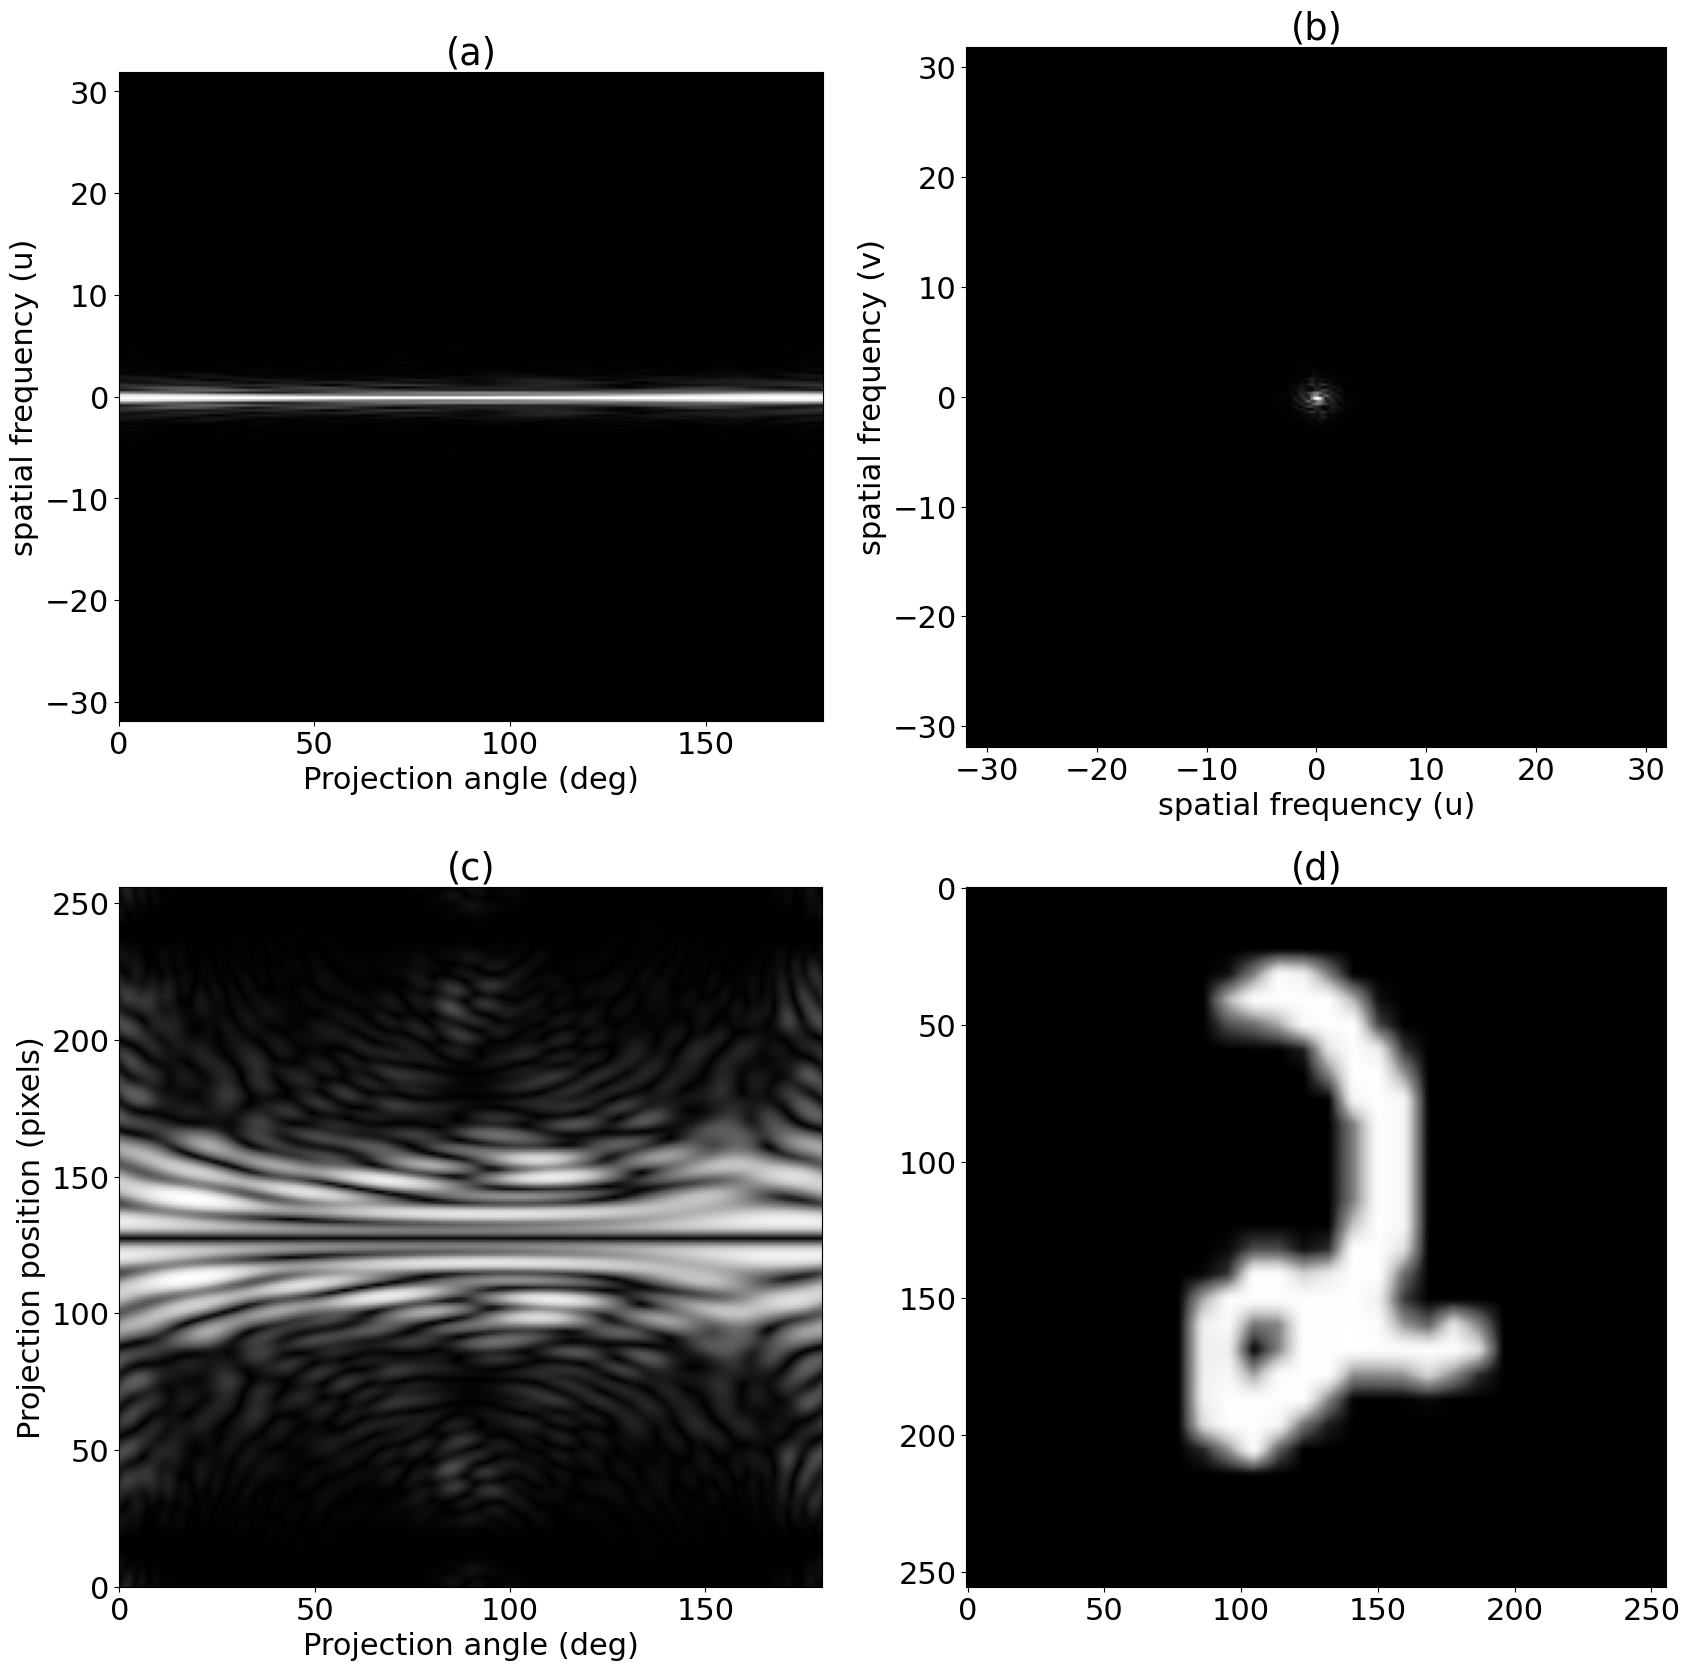

In [ ]:
xMax=2;
nP=256;
xStep=2*xMax/(nP-1);
uMax=1/(2*xStep);uStep=2*uMax/(nP-1);
urange=np.linspace(-uMax,uMax,nP);
xrange=np.linspace(-xMax,xMax,nP);
thetaRange=np.arange(0,180,.5);
[x,y]=np.meshgrid(xrange,xrange);
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
image=x_train[6124,:,:]
image = resize(image, (nP,nP), mode='edge')
rTf1=radon(image,thetaRange);
ftR=np.fft.fftshift(np.fft.fft(np.fft.fftshift(rTf1,axes=0),axis=0),axes=0);
ax[0,0].imshow(np.abs(ftR), cmap=plt.cm.Greys_r, extent = (0 , 180,-uMax  ,uMax) );
ax[0,0].set_title('(a)')
ax[0,0].set_xlabel("Projection angle (deg)")
ax[0,0].set_ylabel("spatial frequency (u)")
ax[0,0].set_aspect(2.6)
ax[0,1].imshow(abs(np.fft.fftshift(np.fft.fft2(image))),cmap=plt.cm.Greys_r,extent = (-uMax,uMax,-uMax,uMax));
ax[0,1].set_title('(b)')
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("spatial frequency (u)")
ax[0,1].set_ylabel("spatial frequency (v)")
[recon, Q]= iradon(rTf1,theta=thetaRange)
ax[1,0].imshow(np.abs(np.fft.fftshift(Q,axes=0))[(512-128):(512+128),:],cmap=plt.cm.Greys_r,extent=[0 , 180, 0  ,256]);
ax[1,0].set_aspect(.7)
ax[1,0].set_title('(c)')
ax[1,0].set_xlabel("Projection angle (deg)")
ax[1,0].set_ylabel("Projection position (pixels)")
ax[1,1].imshow(recon,cmap=plt.cm.Greys_r);
ax[1,1].set_title('(d)')

### Algebraic Reconstruction from Sparse Data

SART (1 iteration) rms reconstruction error: 0.159
SART (1 iteration) rms reconstruction error: 0.152


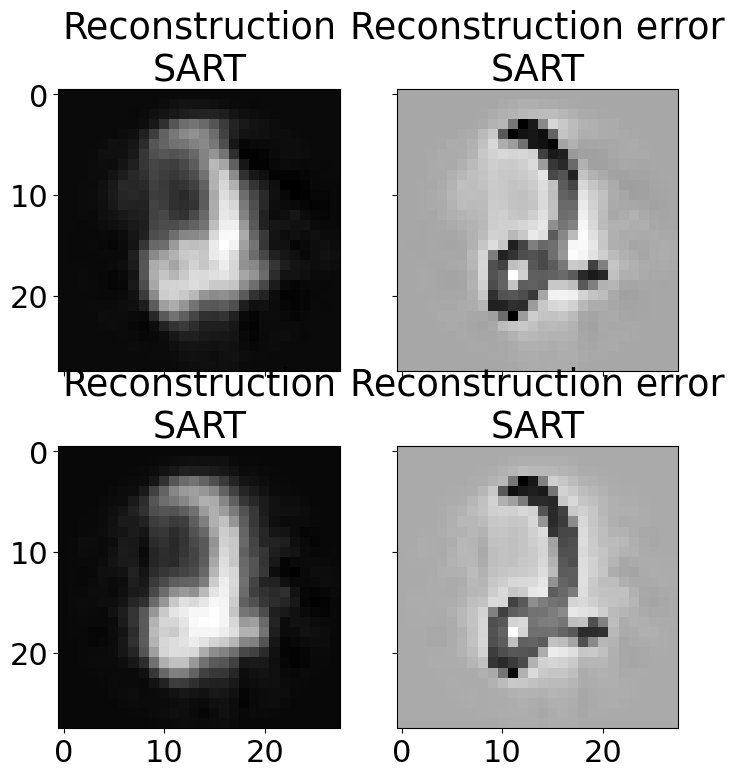

In [ ]:


ntheta=10;
image=x_train[6124,:,:]
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
sinogram=radon(image,thetaVals);
reconstruction_sart = iradon_sart(sinogram, theta=thetaVals)
error = reconstruction_sart - image
print("SART (1 iteration) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

fig, axes = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART")
ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[1].set_title("Reconstruction error\nSART")
ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r)
# no try with regularly spaced samples
thetaVals=np.linspace(0,180,ntheta)
sinogram=radon(image,thetaVals);
reconstruction_sart = iradon_sart(sinogram, theta=thetaVals)
error = reconstruction_sart - image
print("SART (1 iteration) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

ax[2].set_title("Reconstruction\nSART")
ax[2].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[3].set_title("Reconstruction error\nSART")
ax[3].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r)


## Images using Neural compressed sensing

Load and prepare data

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist

ntheta=20;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.


(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(radon(x_test[pop,:,:],thetaVals), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(radon(x_train[pop,:,:],thetaVals), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

1.0


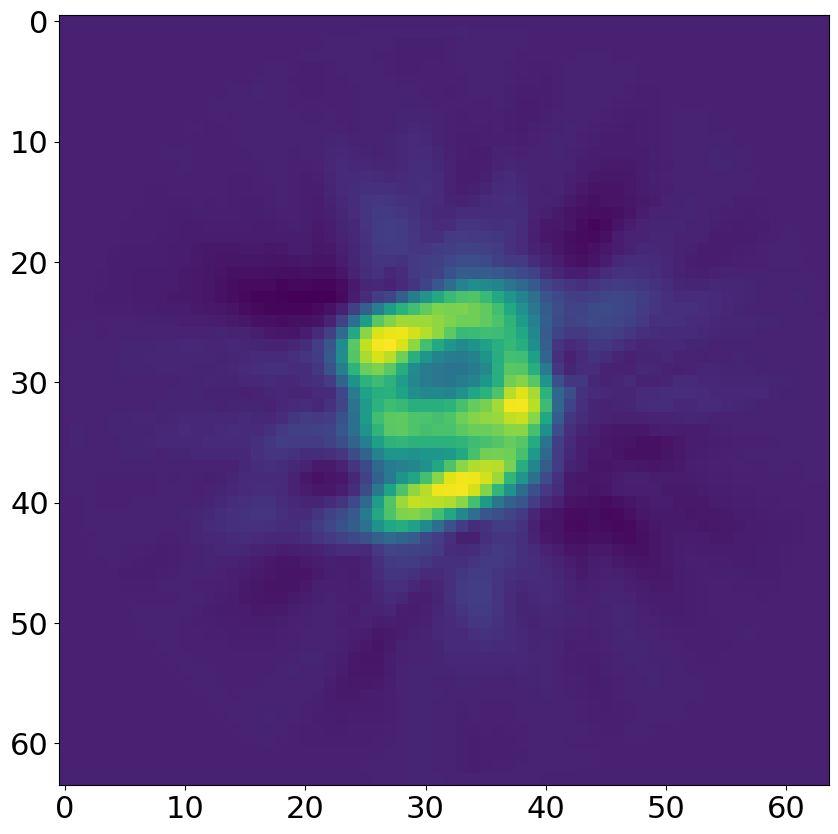

In [ ]:
plt.imshow(g_test[6124].reshape(64, 64))
print(np.max(g_test[6124]))

Encoder/denoising model 3

In [ ]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 64)        36928     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 64, 64, 32)        18464     
 Transpose)                                                  

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 38s 54ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0010 - val_loss: 8.1148e-04
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 7.8063e-04 - val_loss: 6.7904e-04
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 6.7188e-04 - val_loss: 6.1898e-04
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 6.0083e-04 - val_loss: 5.6715e-04
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 5.5762e-04 - val_loss: 5.2118e-04
Epoch 7/10
469/469 [==============================] - 24s 52ms/step - loss: 5.2362e-04 - val_loss: 5.0621e-04
Epoch 8/10
469/469 [==============================] - 23s 48ms/step - loss: 4.9501e-04 - val_loss: 4.7781e-04
Epoch 9/10
469/469 [==============================] - 24s 51ms/step - loss: 4.7456e-04 - val_loss: 4.6157e-04
Epoch 10/10
469/469 [=

Examples of subsampled and estimated images

1/1 [==============================] - 0s 18ms/step


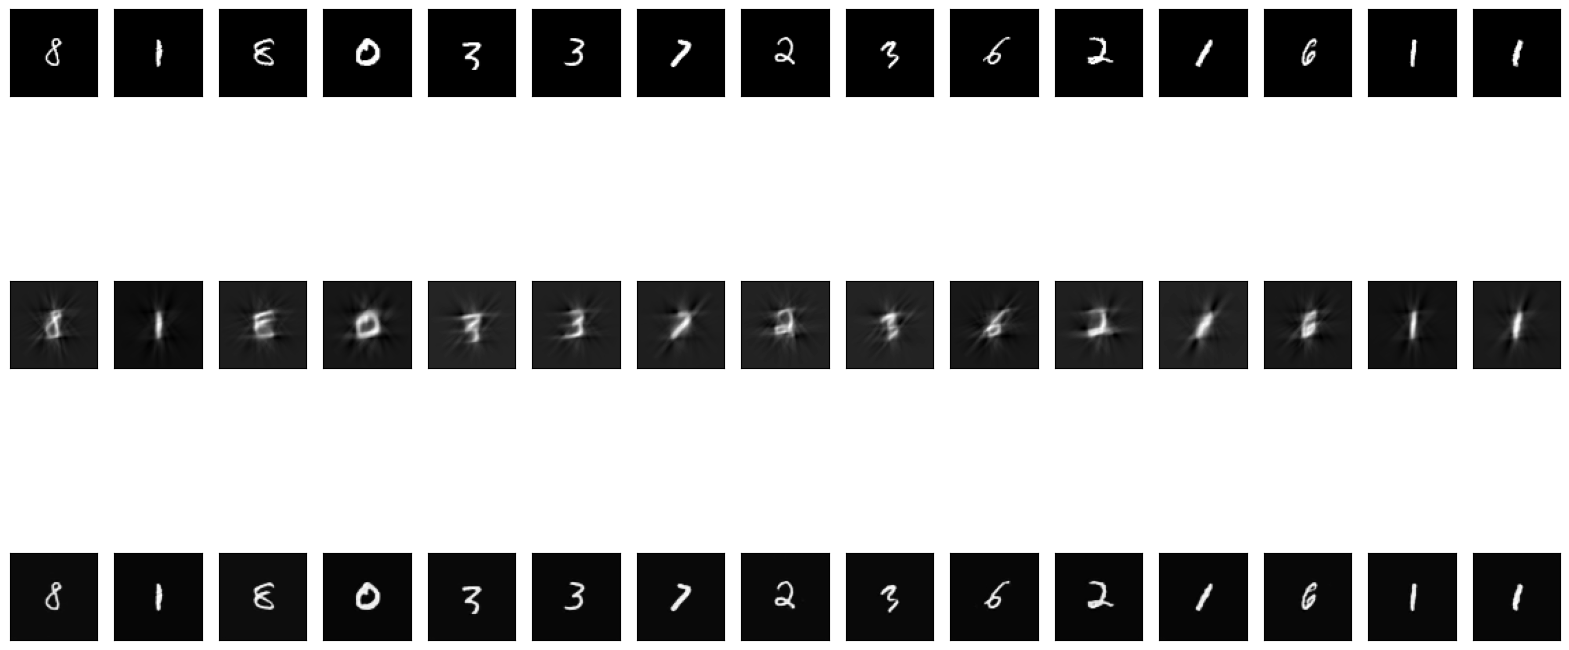

In [ ]:
m = 1200 #sequence start of 10000
n = 15 #number of images to check
plt.figure(figsize=(20, 10))
for i in range(m, m + n):
    ax = plt.subplot(3, n, i-(m-1))
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i-(m-1))
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+(i-(m-1)))
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Neural compressed sensing with noise

load and prepare data

In [6]:
# load the mnist dataset of characters
from keras.datasets import mnist

ntheta=20;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
#
# we are going to add poisson noise to the measurements. nPhoto is an gain factor for the intensity of the measured signal
#
nPhoto=1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_test[pop,:,:],thetaVals))), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_train[pop,:,:],thetaVals))), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

Encoder/denoising model 4

In [7]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 64)        36928     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 64, 64, 32)        18464     
 Transpose)                                                  

Training

In [8]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 37s 51ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/10
469/469 [==============================] - 23s 49ms/step - loss: 0.003

1/1 [==============================] - 0s 18ms/step


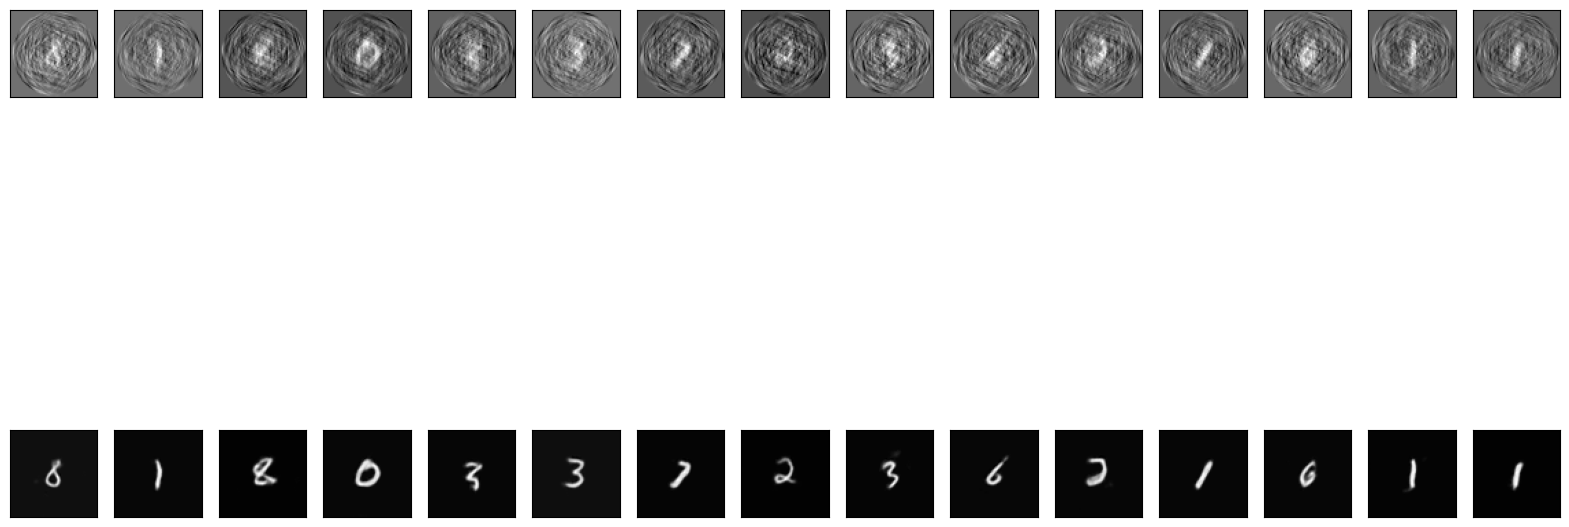

In [9]:
m = 1200 #sequence start of 10000
n = 15 #number of images to check
plt.figure(figsize=(20, 10))
for i in range(m, m + n):
    ax = plt.subplot(2, n, i-(m-1))
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, n+i-(m-1))
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


### Neural fully sampled with noise

load and prepare data

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist

ntheta=20*9;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
#
# we are going to add poisson noise to the measurements. nPhoto is an gain factor for the intensity of the measured signal
#
nPhoto=1/9

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_test[pop,:,:],thetaVals))), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_train[pop,:,:],thetaVals))), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

Encoder/denoising model 5

In [ ]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Training

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

### Results

Various systems were introduced in this section, including: Algebraic Reconstruction from sparse data, neural compressed sensing (subsampling SART and decompression), nerual compressed sensing with noise (same but with 20% noise), neural fully sampled with noise.

For the first neural plot, the algebraic reconstruction of compressively sampled sinograms. The top row shows ground truth images, the center row shows SART reconstruction from data uniformly sampled in $l$ with 20 different values of $θ$ randomly sampled between 0 and 180 degrees. The bottom row shows decompressive inference from the subsampled data using an autoencoder neural network trained with examples from the middle row as input and the ground truth as output.

*The whole point is to use undersampled data, one noise model may be to assume Poisson statistics for this measurement model. Another approach may be to model more detailed statistics on the logarithm of the physical measurements. In priciple we anticipate that undersampling can yield improved estimation for the following reasons: measurements are collected sequentially and the information rate per ray measurement varies.*

The second neural plot with neural reconstruction and denoising using the architecture and test objects again with 20 projection angles. We simulate Poisson noise with ≈ 1000 photons per unattenuated projection as reduced by the object. The top row shows the simulated SART reconstruction from the noisy measurements, the bottom row is recovered from the top row using an autoencoder denoising network trained jointly on the noise and sampling artifacts.

The thrid plot shows neural reconstruction and denoising using SART with 180 projection angles. Total exposure is the same as in the second plot but the signal per ray is reduced by 9× because the number of rays is increased by 9×. In the presence of noise it can be advantageous to reconstruct using less data with better SNR than with full data. This is to be taken with a grain of salt as this illustrations are made with extreme examples to show the clear result.
